In [12]:
import numpy as np
import matplotlib.pyplot as plt
from result_utils import *
import scipy.io
import os
import glob

In [13]:

def calculate_ae(pred: np.ndarray, label: np.ndarray):
    adotb = np.sum(pred * label, axis=1, keepdims=True)
    norma = np.linalg.norm(pred, axis=1, keepdims=True)
    normb = np.linalg.norm(label, axis=1, keepdims=True)
    ae = np.arccos(adotb / norma / normb)
    return ae

In [14]:
data_path = r"path/to/data"

In [15]:
test_lists_path = os.path.join(data_path, 'test_list.csv')
with open(test_lists_path) as f:
    test_list = sorted(f.read().split('\n')[:-1])
test_list.pop(0)
test_list.pop(1)
test_list.pop(7)

tests = [crop_to_bbox(scipy.io.loadmat(os.path.join(data_path, *pth.split('/')))) for pth in test_list]
test_list


['indoor/box_f.mat',
 'indoor/dragon_l.mat',
 'indoor/father_christmas_f.mat',
 'indoor/flamingo_queen_l.mat',
 'indoor/horse_l.mat',
 'indoor/vase2_l.mat',
 'outdoor_cloudy/box_f.mat',
 'outdoor_cloudy/dragon_l.mat',
 'outdoor_cloudy/father_christmas_f.mat',
 'outdoor_cloudy/flamingo_queen_l.mat',
 'outdoor_cloudy/horse_l.mat',
 'outdoor_cloudy/vase2_l.mat',
 'outdoor_sunny/box_f.mat',
 'outdoor_sunny/dragon_l.mat',
 'outdoor_sunny/father_christmas_f.mat',
 'outdoor_sunny/flamingo_queen_l.mat',
 'outdoor_sunny/horse_l.mat',
 'outdoor_sunny/vase2_l.mat']

In [ ]:
predictions_path = 'path/to/predictions'

In [ ]:
preds_paths = sorted(glob.glob(os.path.join(predictions_path, '*.npy')))
preds_paths.pop(0)
preds_paths.pop(1)
preds_paths.pop(7)
preds_paths

In [17]:
sae = 0
count = 0
for i, obj in enumerate(tests):
    mask = obj['mask']
    pred = np.load(preds_paths[i])
    gt = obj['Normals_gt']
    ae = calculate_ae(pred[mask==1], gt[mask==1])
    count += len(ae)
    sae += np.sum(ae)
    if np.any(np.isnan(ae)):
        break
mae = sae / count
mae, np.rad2deg(mae)
# ae_list = np.array(ae_list)
# ae_list.shape

(0.32030007579891734, 18.351842520998325)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


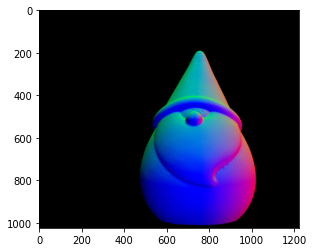

In [48]:
plt.imshow(gt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


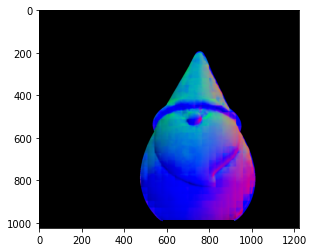

In [49]:
plt.imshow(pred)

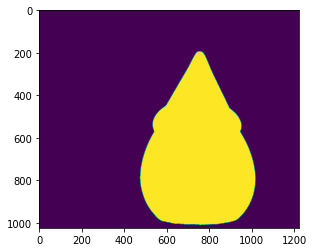

In [50]:
plt.imshow(mask)

In [57]:
np.pad(pred, 64).shape

(1152, 1352, 131)

In [62]:
padd = np.pad(pred, ((64, 64), (64, 64), (0, 0)), 'constant', constant_values=((0, 0), (0, 0), (0, 0)))
padd.shape

(1152, 1352, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


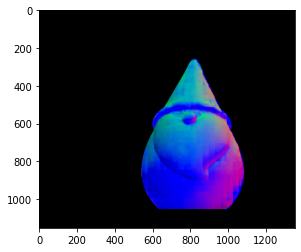

In [63]:
plt.imshow(padd)